Selen Çiğdem<br>
Id:18050111006

# Question 1

In [1]:
import numpy as np
from matplotlib import cm
num_inputs=2 #number of features of each input
num_hidden=2 #number of neurons in hidden layer
num_output=1 #number of neurons in output layer
X_tanh=np.array([[1,1],[1,-1],[-1,1],[-1,-1]]) #inputs for four data for tanh
Y_tanh=np.array([-1,1,1,-1]) #outputs for four data for tanh

#initialize parameters seperately for tanh and sigmoid

#parameters for tanh:
W1=np.array([1,1,1,1])
W1=W1.reshape((num_inputs,num_hidden))+np.ones((num_inputs,num_hidden))*0.2
B1=np.array([0.5,-0.8]).reshape((-1,num_hidden))
W2=np.array([0.5,-0.4])
W2=W2.reshape((num_hidden,num_output))
B2=np.array([-0.4])
parameters=[[W1,B1,W2,B2]]
parameters

[[array([[1.2, 1.2],
         [1.2, 1.2]]),
  array([[ 0.5, -0.8]]),
  array([[ 0.5],
         [-0.4]]),
  array([-0.4])]]

In [2]:
#parameters for sigmoid:
X_sigmoid=np.array([[1,1],[1,0],[0,1],[0,0]]) #inputs for four data for sigmoid
Y_sigmoid=np.array([0,1,1,0]) #outputs for four data for sigmoid
W1_sigmoid =np.array([2.4,3.6,3.4,3])
W1_sigmoid=W1_sigmoid.reshape((num_inputs,num_hidden))
B1_sigmoid=np.array([-5.2,-2.2]).reshape((-1,num_hidden))
W2_sigmoid=np.array([-7.5,7.0])
B2_sigmoid=np.array([-3.1])
parameters_sigmoid=[[W1_sigmoid,B1_sigmoid,W2_sigmoid,B2_sigmoid]]
parameters_sigmoid

[[array([[2.4, 3.6],
         [3.4, 3. ]]),
  array([[-5.2, -2.2]]),
  array([-7.5,  7. ]),
  array([-3.1])]]

In [3]:
#activation functions are defined
def tanh(y_net):
    x=np.exp(y_net)-np.exp(-1*y_net)
    partition=np.exp(y_net)+np.exp(-1*y_net)
    return x/partition

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
#Final output should be quantized to clssify data based on labels(-1,1 for tanh and 0,1 for sigmoid)
quantize_tanh = lambda y_output : np.where(y_output > 0, 1, -1)
quantize_sigmoid = lambda y_output : np.where(y_output > 0.5, 1, 0)

In [5]:
#below function makes calculations for tanh
def forward_tanh(X_tanh,parameters):
    
    W1=parameters[0][0]
    B1=parameters[0][1]
    W2=parameters[0][2]
    B2=parameters[0][3]
    
    y_net_hidden=np.dot(X_tanh,W1)+B1
    y_hidden=tanh(y_net_hidden)
    y_net_output=np.dot(y_hidden,W2)+B2
    y_output=tanh(y_net_output)
    y_hat=quantize_tanh(y_output)
    #it returns also outputs of neurons in hidden layer since I'll use them as drawing decision surface
    return y_hidden,y_hat


In [6]:
#below function makes calculations for sigmoid
def forward_sigmoid(X_tanh,parameters):
  
    
    W1=parameters[0][0]
    B1=parameters[0][1]
    W2=parameters[0][2]
    B2=parameters[0][3]

    y_net_hidden=np.dot(X_tanh,W1)+B1
    y_hidden=sigmoid(y_net_hidden)
    y_net_output=np.dot(y_hidden,W2)+B2
    y_output=sigmoid(y_net_output)
    y_hat=quantize_sigmoid(y_output)
    #it returns also outputs of neurons in hidden layer since I'll use them as drawing decision surface
    return y_hidden,y_hat

In [7]:
#here, calculates y_hat for tanh and sigmoid seperately
temp,y_hat_tanh=forward_tanh(X_tanh,parameters) 
temp,y_hat_sigmoid=forward_sigmoid(X_sigmoid,parameters_sigmoid)
y_hat_tanh, y_hat_sigmoid


(array([[-1],
        [ 1],
        [ 1],
        [-1]]),
 array([0, 1, 1, 0]))

In [8]:
#I also calculated accuracy for the outputs of tanh and sigmoid seperately to prove that all outputs of four data are matched perfectly
from sklearn.metrics import accuracy_score
print("classification accuracy using tanh as activation function=", accuracy_score(y_hat_tanh,Y_tanh)) 
print("classification accuracy for sigmoid as activation function=", accuracy_score(y_hat_sigmoid,Y_sigmoid)) 


classification accuracy using tanh as activation function= 1.0
classification accuracy for sigmoid as activation function= 1.0


In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#below function draws network graph
def draw_directed_graph(parameters):  
    import networkx as nx  
    import matplotlib.pyplot as plt
    W1=parameters[0][0]
    B1=parameters[0][1]
    W2=parameters[0][2]
    B2=parameters[0][3]
    
    plt.figure(figsize=(10,7))
    ax = plt.gca()
    ax.set_title('Network graph',color="brown",fontsize=26)
    G=nx.DiGraph()
    G.add_node("bias",pos=(0.5,2)), G.add_node("x1",pos=(0,0)),G.add_node("x2",pos=(0,2)),G.add_node("O1",pos=(1,0.5)),G.add_node("O2",pos=(1,1)),G.add_node("O",pos=(3,1.5))
    G.add_edge("x1", "O1",color='r',weight= round(W1[0][0],2))
    G.add_edge("x1", "O2",color='red',weight=W1[0][1] )
    G.add_edge("x2", "O1",color="r",weight= W1[1][0])
    G.add_edge("x2", "O2",color="r",weight= round(W1[1][1],2))
    G.add_edge("O1", "O",color="b",weight= 0.5)
    G.add_edge("O2","O",color="b",weight= -0.4)
    G.add_edge("bias", "O1",color='g',weight= B1[0][0])
    G.add_edge("bias", "O2",color='g',weight= B1[0][1])
    G.add_edge("bias", "O",color='g',weight= B2[0])
    pos=nx.get_node_attributes(G,'pos')
    edge_labels = dict()
    edges = G.edges()
    colors = [G[u][v]['color'] for u,v in edges]
    #edge_labels={("x1","O1"):"1",("x1","O2"):"1",("x2","O1"):"1",("x2","O2"):"1",("O1","O"):"0.7",("O2","O"):"-0.4"}
    labels = nx.get_edge_attributes(G,'weight')

    nx.draw(G, with_labels=True,node_size=500, font_weight='bold',edge_color=colors,pos=pos)

    nx.draw_networkx_edge_labels(G,edge_labels=labels,pos=pos)
    plt.show()


For tanh function:


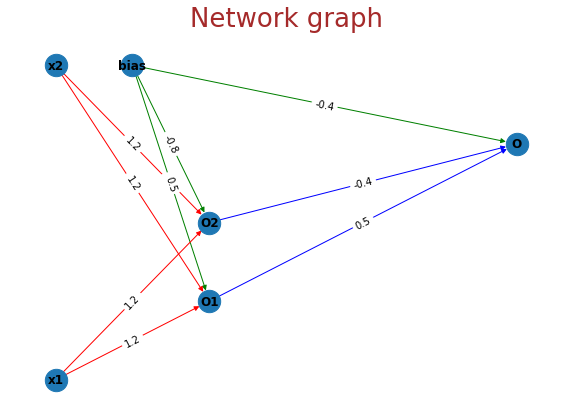

In [10]:
print("For tanh function:")
draw_directed_graph(parameters)
#network graph for tanh function

For sigmoid function:


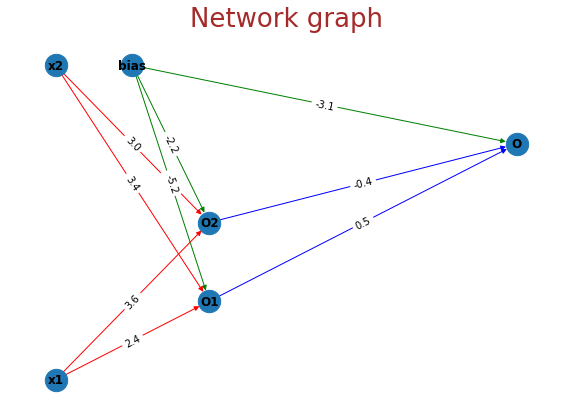

In [11]:
print("For sigmoid function:")
draw_directed_graph(parameters_sigmoid)
#network graph for sigmoid function

# Question 2

In [12]:
def draw_graphs_tanh():
    
    x1grid = np.arange(-1, 1.0, 0.1)
    x2grid = np.arange(-1, 1.0, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)

    x_grid= np.c_[xx.flatten(), yy.flatten()]

    global parameters

    y_hidden,y_output=forward_tanh(x_grid,parameters)
    y_hidden=quantize_tanh(y_hidden)
    
    O1=y_hidden[:,[0]] #outputs of first neuron in hidden layer
    O2=y_hidden[:,[1]] #outputs of second neuron in hidden layer

    fig, ax = plt.subplots(2,2,subplot_kw={"projection": "3d"})
    plt.suptitle('Applying tanh as Activation Function',color="blue",fontsize=20)
    
    surf=ax[0,0].plot_surface(xx, yy,O1.reshape(xx.shape), alpha=0.5, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.8, aspect=10,ax=ax[0,0])
    ax[0,0].set_title("Output 1",fontsize=16)
    ax[0,0].set(xlabel='X1', ylabel='X2', zlabel='Z')
    
    surf=ax[0,1].plot_surface(xx, yy,O2.reshape(xx.shape), alpha=0.5, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.8, aspect=10,ax=ax[0,1])
    ax[0,1].set_title("Output 2",fontsize=16)
    ax[0,1].set(xlabel='X1', ylabel='X2', zlabel='Z')
    
    surf=ax[1,0].plot_surface(xx, yy,y_output.reshape(xx.shape), alpha=0.5, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.8, aspect=10,ax=ax[1,0])
    ax[1,0].set_title("Final Output",fontsize=16)
    ax[1,0].set(xlabel='X1', ylabel='X2', zlabel='Z')
    
    fig.delaxes(ax[1,1]) #I don't use fourth graph and I don't know how to create subplot with 3 graphs so I created subplot with 4 graphs and deleted fourth one.
    fig.set_figheight(12)
    fig.set_figwidth(16)
    fig.subplots_adjust(hspace=0.5,wspace=0.0)
    plt.show()

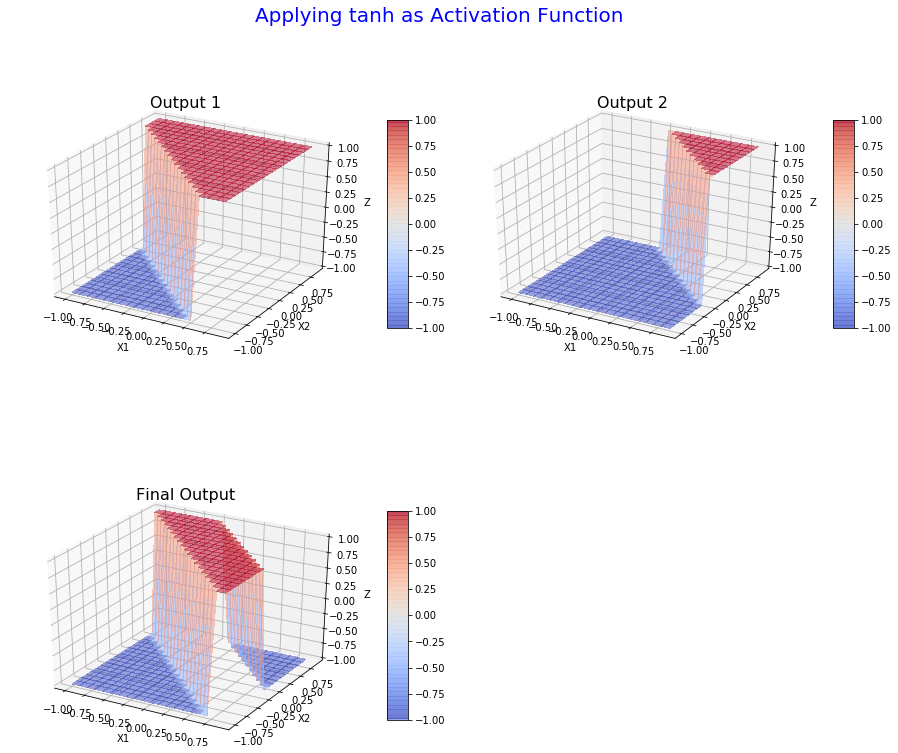

In [13]:
draw_graphs_tanh()

I'll initialize another parameters to draw decision surface for sigmoid since using the parameters that gives 1.0 accuracy for four data doesn't shape good looking decision surface. It is not necessary, I can also use same parameters but I prefer to initialize another.

In [14]:
B1_s=np.array([-0.4,0.8]).reshape((-1,num_hidden))
parameters=[[W1,B1,W2,B2]]
W2_s=np.array([-1.9,2.7])
W2_s=W2_s.reshape((num_hidden,num_output))
B2_s=np.array([-1])
parameters_s=[[W1,B1_s,W2_s,B2_s]]
parameters_s

[[array([[1.2, 1.2],
         [1.2, 1.2]]),
  array([[-0.4,  0.8]]),
  array([[-1.9],
         [ 2.7]]),
  array([-1])]]

In [15]:
def draw_graphs_sigmoid():

    x1grid = np.arange(-1, 1.0, 0.15)
    x2grid = np.arange(-1, 1, 0.15)
    xx, yy = np.meshgrid(x1grid, x2grid)
    x_grid= np.c_[xx.flatten(), yy.flatten()]

    global parameters_s
    
    
    y_hidden,y_output=forward_sigmoid(x_grid,parameters_s)
    y_hidden=quantize_sigmoid(y_hidden)
    O1=y_hidden[:,[0]] #outputs of first neuron in hidden layer
    O2=y_hidden[:,[1]] #outputs of second neuron in hidden layer
    
    fig, ax = plt.subplots(2,2,subplot_kw={"projection": "3d"})
    plt.suptitle('Applying sigmoid as Activation Function',color="red",fontsize=20)

    surf=ax[0,0].plot_surface(xx, yy,O1.reshape(xx.shape), alpha=0.5, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.8, aspect=10,ax=ax[0,0])
    ax[0,0].set_title("Output 1",fontsize=16)
    ax[0,0].set(xlabel='X1', ylabel='X2', zlabel='Z')
    
  
    surf=ax[0,1].plot_surface(xx, yy,O2.reshape(xx.shape), alpha=0.5, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.8, aspect=10,ax=ax[0,1])
    ax[0,1].set_title("Output 2",fontsize=16)
    ax[0,1].set(xlabel='X1', ylabel='X2', zlabel='Z')
    
    surf=ax[1,0].plot_surface(xx, yy,y_output.reshape(xx.shape), alpha=0.5, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.8, aspect=10,ax=ax[1,0])
    ax[1,0].set_title("Final Output",fontsize=16)
    ax[1,0].set(xlabel='X1', ylabel='X2', zlabel='Z')
        
    fig.delaxes(ax[1,1])
    fig.set_figheight(12)
    fig.set_figwidth(16)
    fig.subplots_adjust(hspace=0.5,wspace=0)
    plt.show()

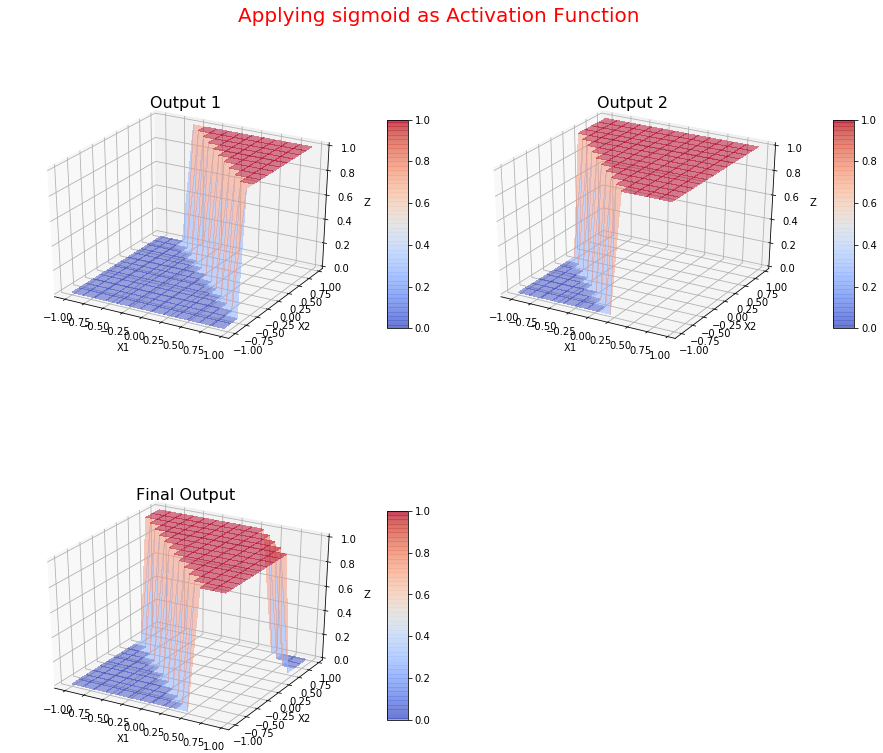

In [16]:
draw_graphs_sigmoid()

In [17]:
#this is the optional part
def decision_boundary_2D(xx,yy,zz,input,output):
    CS = plt.contourf(xx, yy, zz, cmap='binary')
    plt.scatter(input[:,[0]],input[:,[1]], s=150, color='g')
    plt.title("decision boundary",fontsize=20,color='g')
    plt.xlabel("x1", color="g",fontsize=14)
    plt.ylabel("x2",color="g",fontsize=14)

for tanh: 


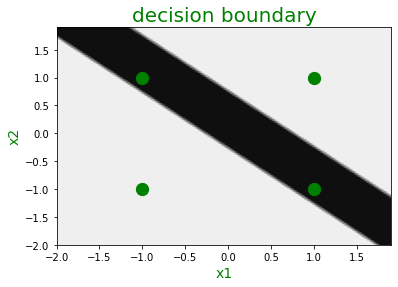

In [18]:
x1grid = np.arange(-2, 2.0, 0.1)
x2grid = np.arange(-2, 2.0, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)

x_grid= np.c_[xx.flatten(), yy.flatten()]
temp,zz=forward_tanh(x_grid,parameters)
zz=zz.reshape(xx.shape)
print("for tanh: ")
decision_boundary_2D(xx,yy,zz,X_tanh,Y_tanh)

for sigmoid


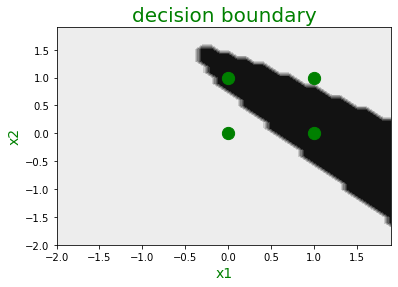

In [19]:
print("for sigmoid")
temp,zz=forward_sigmoid(x_grid,parameters_sigmoid)
zz=zz.reshape(xx.shape)
decision_boundary_2D(xx,yy,zz,X_sigmoid,Y_sigmoid)